<a href="https://colab.research.google.com/github/chsandeep8/asgnmt1/blob/main/WomenFrailty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Raw Data**


Upload Raw Data file in the files setions

In [1]:
from google.colab import files
uploaded = files.upload()

Saving rawdata.csv to rawdata (1).csv


importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns


Load data to dataframe

In [3]:
df = pd.read_csv("rawdata.csv")

In [4]:
df.head()

,height,weight,age,grip_strength,frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


**clean data**

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['frailty']=le.fit_transform(df['frailty'])
print(df.to_string())

   height  weight  age  grip_strength  frailty
0    65.8     112   30             30        0
1    71.5     136   19             31        0
2    69.4     153   45             29        0
3    68.2     142   22             28        1
4    67.8     144   29             24        1
5    68.7     123   50             26        0
6    69.8     141   51             22        1
7    70.1     136   23             20        1
8    67.9     112   17             19        0
9    66.8     120   39             31        0


creating csv file of clean data and moving it to project folder

In [10]:
df.to_csv("/content/Womenfrailty/Cleandata/clean_data.csv")

Analysis

first we have to understand data by checking columns and data to perform analysis

In [14]:
df.columns

Index(['height', 'weight', 'age', 'grip_strength', 'frailty'], dtype='object')

In [18]:
df.info

<bound method DataFrame.info of    height  weight  age  grip_strength  frailty
0    65.8     112   30             30        0
1    71.5     136   19             31        0
2    69.4     153   45             29        0
3    68.2     142   22             28        1
4    67.8     144   29             24        1
5    68.7     123   50             26        0
6    69.8     141   51             22        1
7    70.1     136   23             20        1
8    67.9     112   17             19        0
9    66.8     120   39             31        0>

checking relation between frailty and other columns

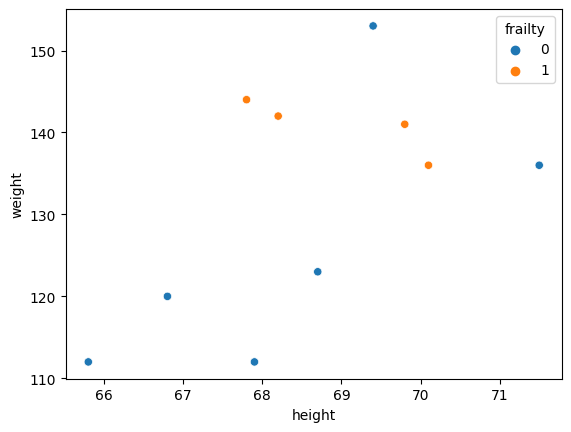

In [53]:
relation = sns.scatterplot(data=df, x='height', y='weight', hue='frailty')
img=relation.get_figure()
img.savefig("/content/Womenfrailty/Results/weightandheightrelation.png")

we can see there is relationship between weight height and frality to make this assumption more stong will add new column BMI and see relationship between BMI and frality

adding new column BMI

In [22]:
df['BMI'] = df['weight'] / (df['height'] ** 2) * 703


In [31]:
print(df)

   height  weight  age  grip_strength  frailty        BMI
0    65.8     112   30             30        0  18.185346
1    71.5     136   19             31        0  18.701746
2    69.4     153   45             29        0  22.332010
3    68.2     142   22             28        1  21.462234
4    67.8     144   29             24        1  22.022085
5    68.7     123   50             26        0  18.320907
6    69.8     141   51             22        1  20.345276
7    70.1     136   23             20        1  19.456208
8    67.9     112   17             19        0  17.077874
9    66.8     120   39             31        0  18.905303


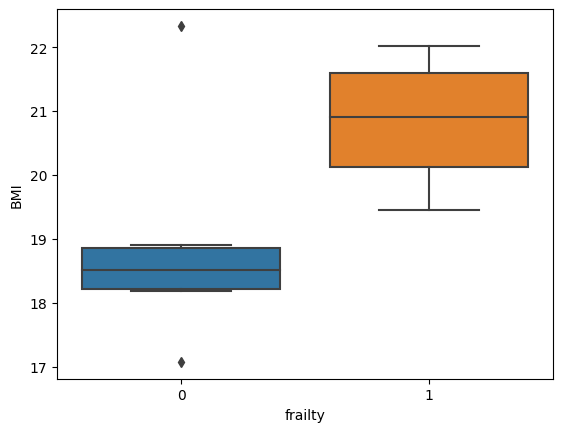

In [52]:
bmiplot=sns.boxplot(data=df, x='frailty', y='BMI')
img=bmiplot.get_figure()
img.savefig("/content/Womenfrailty/Results/bmifralityrelation.png")

From above we can clearly see that women who's bmi is below 19 wont have frailty and whose bmi is more than 19 have frailty only one women don't have frailty even she has bmi 23